In [ ]:
!wget "https://github.com/ausungju/human_learning/raw/main/trash_new.npy" -O trash.npy
!wget "https://github.com/ausungju/human_learning/raw/main/target_new.npy" -O target.npy

--2023-05-30 02:06:04--  https://github.com/ausungju/human_learning/raw/main/trash_new.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ausungju/human_learning/main/trash_new.npy [following]
--2023-05-30 02:06:04--  https://media.githubusercontent.com/media/ausungju/human_learning/main/trash_new.npy
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139200128 (133M) [application/octet-stream]
Saving to: ‘trash.npy’

trash.npy           100%[===================>] 132.75M   205MB/s    in 0.6s    

2023-05-30 02:06:10 (205 MB/s) - ‘trash.npy’ saved [139200128/139200128]

--2023-

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#저장해둔 trash.npy와 target 데이터를 불러오기 
trash = np.load("trash.npy")
target = np.load("target.npy")

In [ ]:
trash.astype(np.uint8)

#훈련가능하게 데이터변환
dataset_size = trash.shape[0]
input_2d = trash.reshape(dataset_size,-1)

input_scaler = input_2d /255.0

#PCA분
from sklearn.decomposition import PCA
pca = PCA(n_components = 500)
pca.fit(input_scaler)
input_pca = pca.transform(input_2d)
print(input_pca.shape)

(18560, 500)


In [ ]:
sum(pca.explained_variance_ratio_)

0.7748431114386277

In [ ]:
#필요한 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#훈련세트와 테스트세트로 나눠주기
train_input, test_input, train_target, test_target = train_test_split(
    input_pca, target, test_size = 0.2, stratify=target,random_state=22)

In [ ]:
model = LogisticRegression(C=50, max_iter=20, n_jobs=2)
model.fit(train_input, train_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.3355334051724138
0.32570043103448276


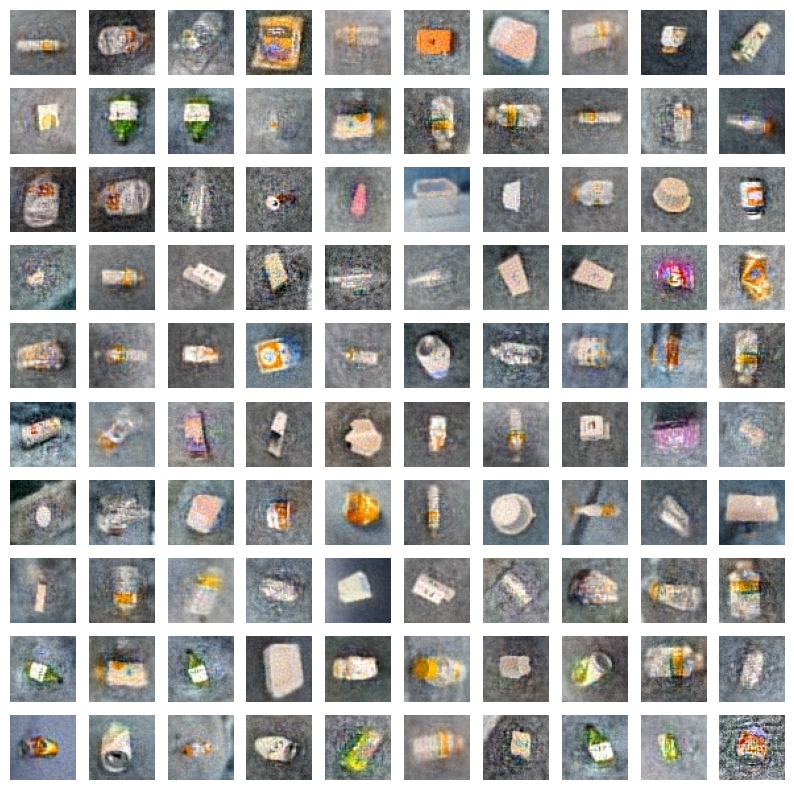

In [ ]:
index = [ x for x, y in enumerate(model.predict( test_input )) if y == 1 ] # 해당 Class별 인덱스

test_input2 = pca.inverse_transform(test_input)
test_input2 = test_input2.reshape(-1,50,50,3) #* 255.0
test_input2 =np.asarray(test_input2, dtype= int)

size = int(np.ceil(np.sqrt(len(index[:100]))))
n = 0;
fig, axs = plt.subplots(size,size,figsize=(size,size))
for i in range(size): 
    for j in range(size): 
        if n >= len(index) : break
        axs[i,j].imshow(test_input2[index[i*size+j]])
        axs[i,j].axis('off') 
        n = n + 1